# This is an exploratory data analysis on a dataset of passengers of the Titanic

### 1). Import libraries and read in the dataset

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
titanic_df = pd.read_csv("titanic_train.csv")

In [52]:
# Preview the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2). Who were the passengers on the titanic?

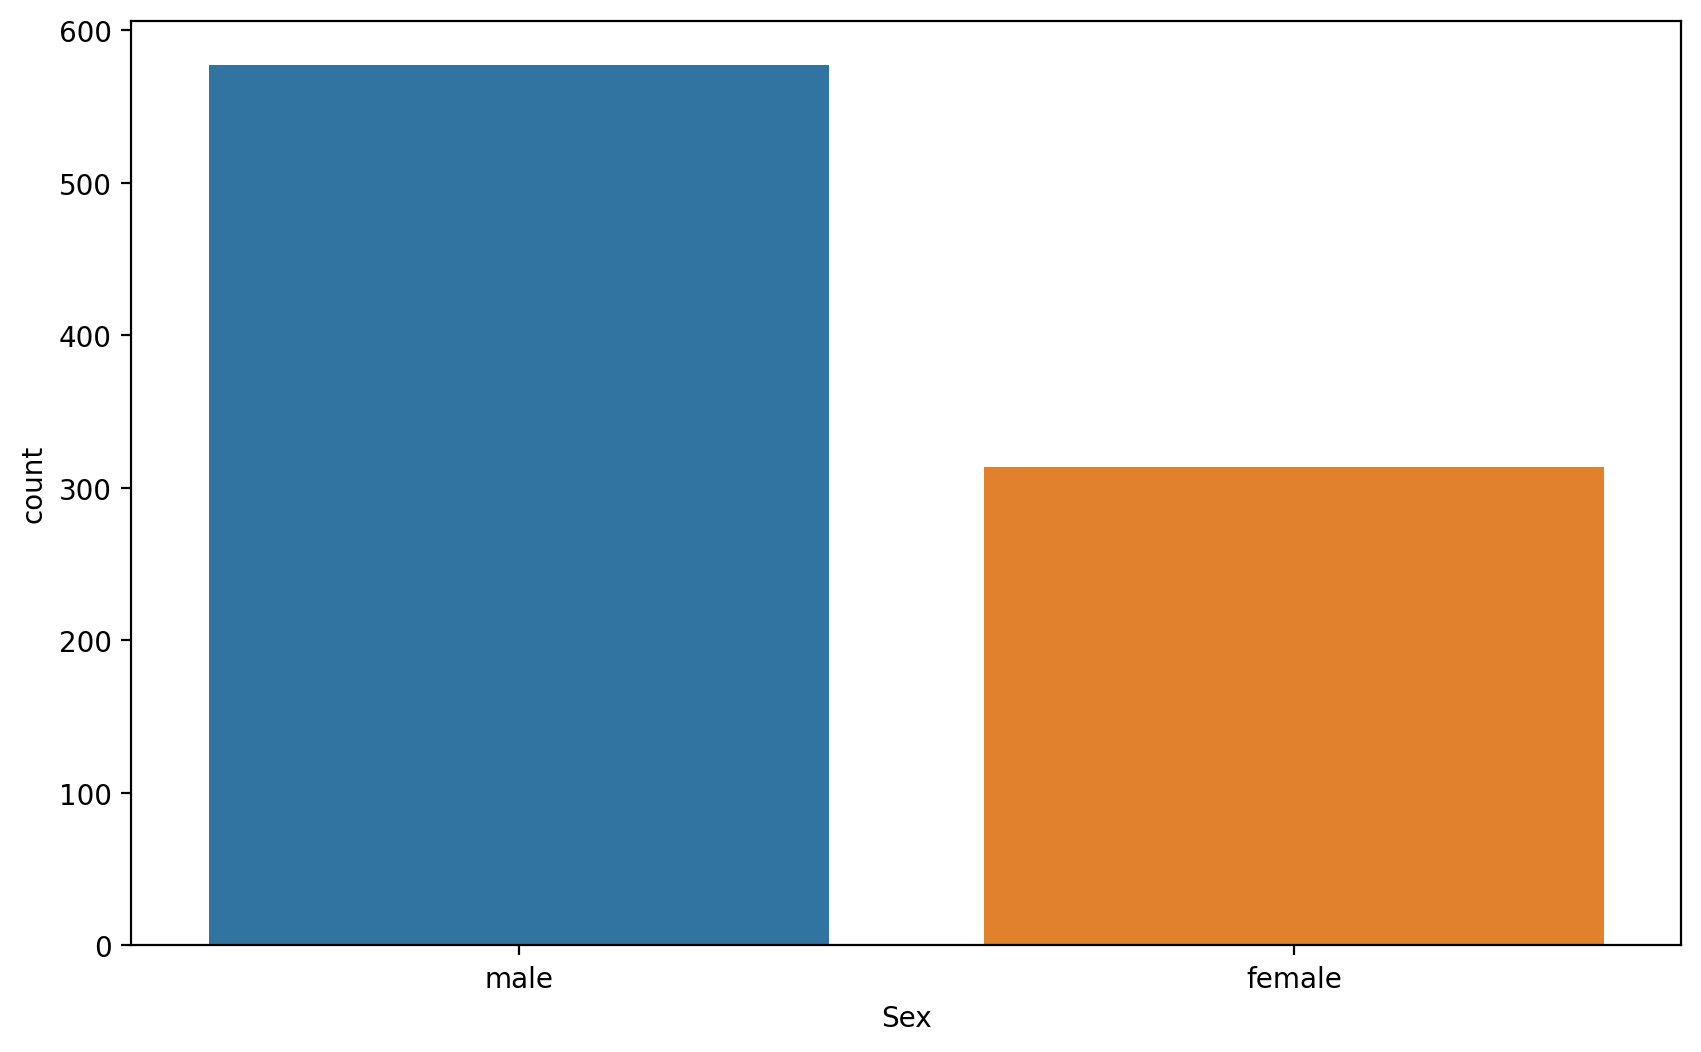

In [54]:
# This shows the comparison of the gender of passengers
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(data=titanic_df, x="Sex");

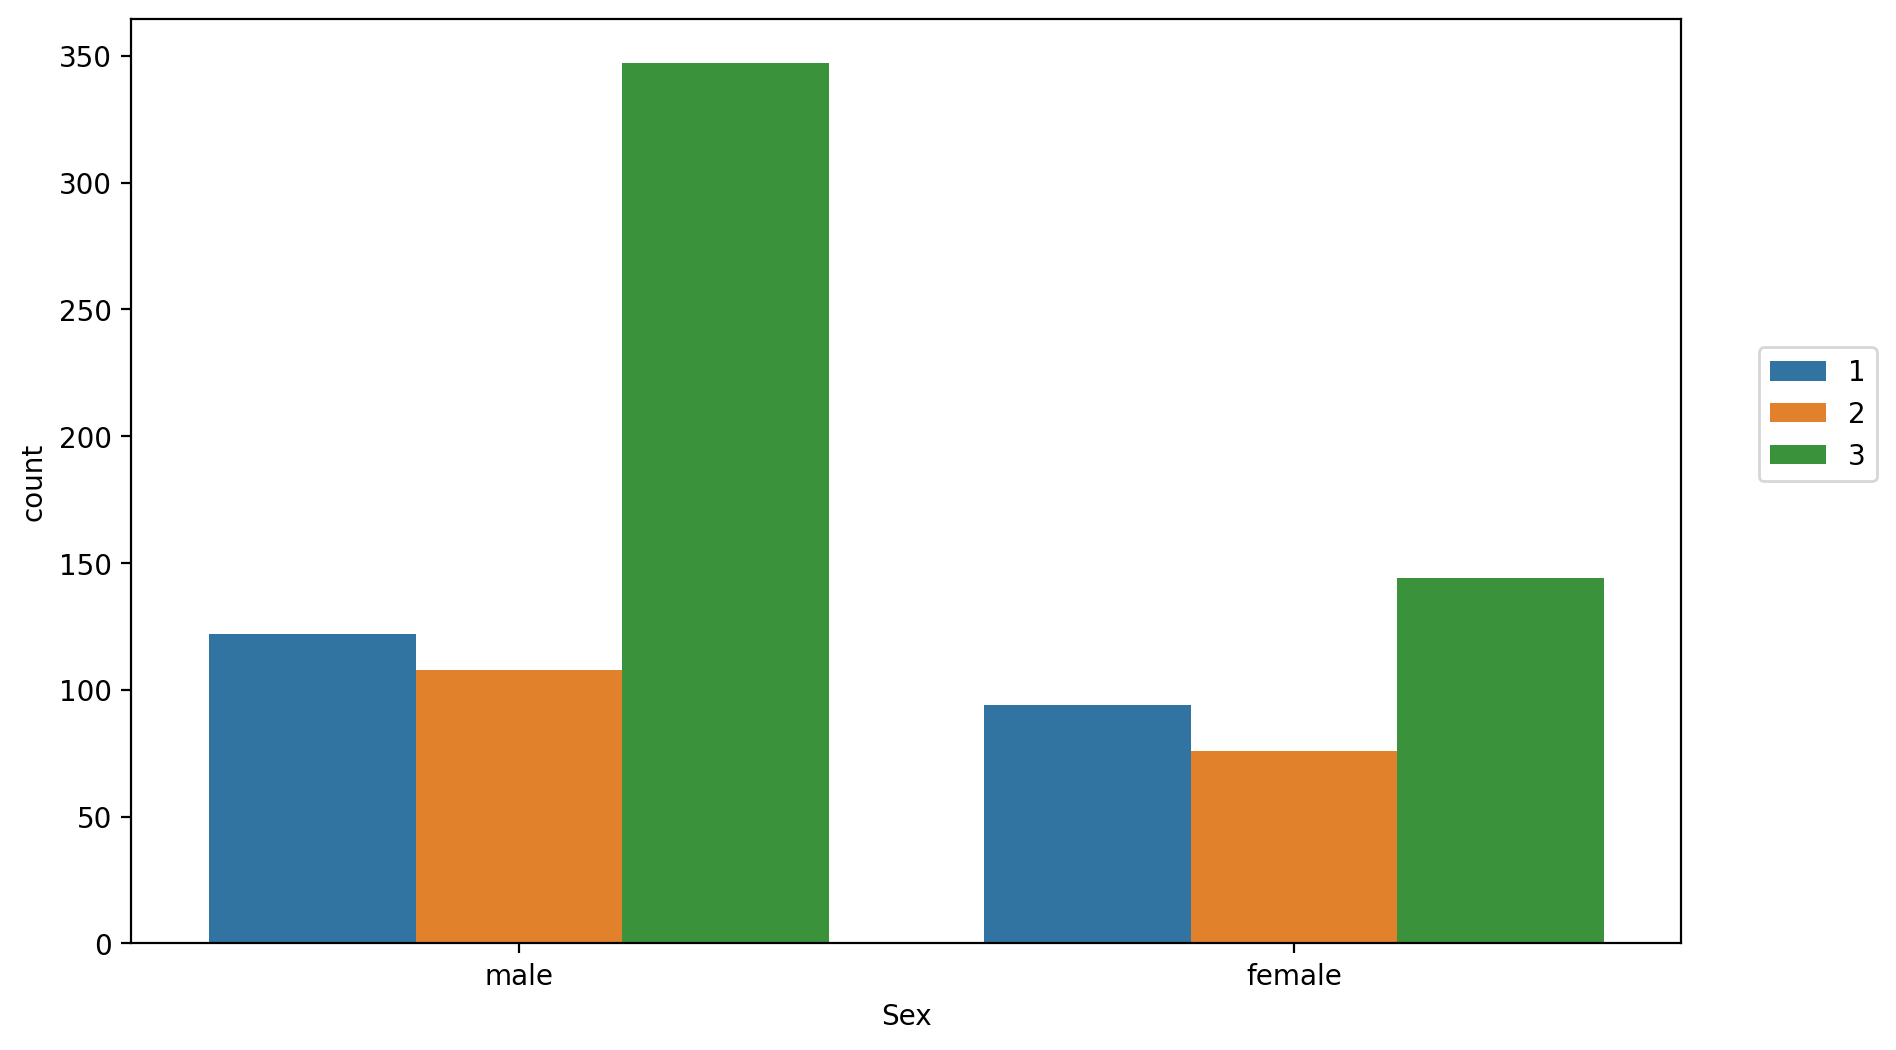

In [55]:
# This does the exact same thing as the cell above, but seperates the genders by classes
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(data=titanic_df, x="Sex",hue="Pclass")

plt.legend(loc=(1.05,0.5));

In [56]:
# The function below attempts to seperate children (i.e under the age of 18) from adults
def children(passenger):
    age, sex = passenger
    
    if age < 18:
        return "child"
    else:
        return sex

In [57]:
titanic_df["Person"] = titanic_df[["Age", "Sex"]].apply(children, axis=1)

In [58]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


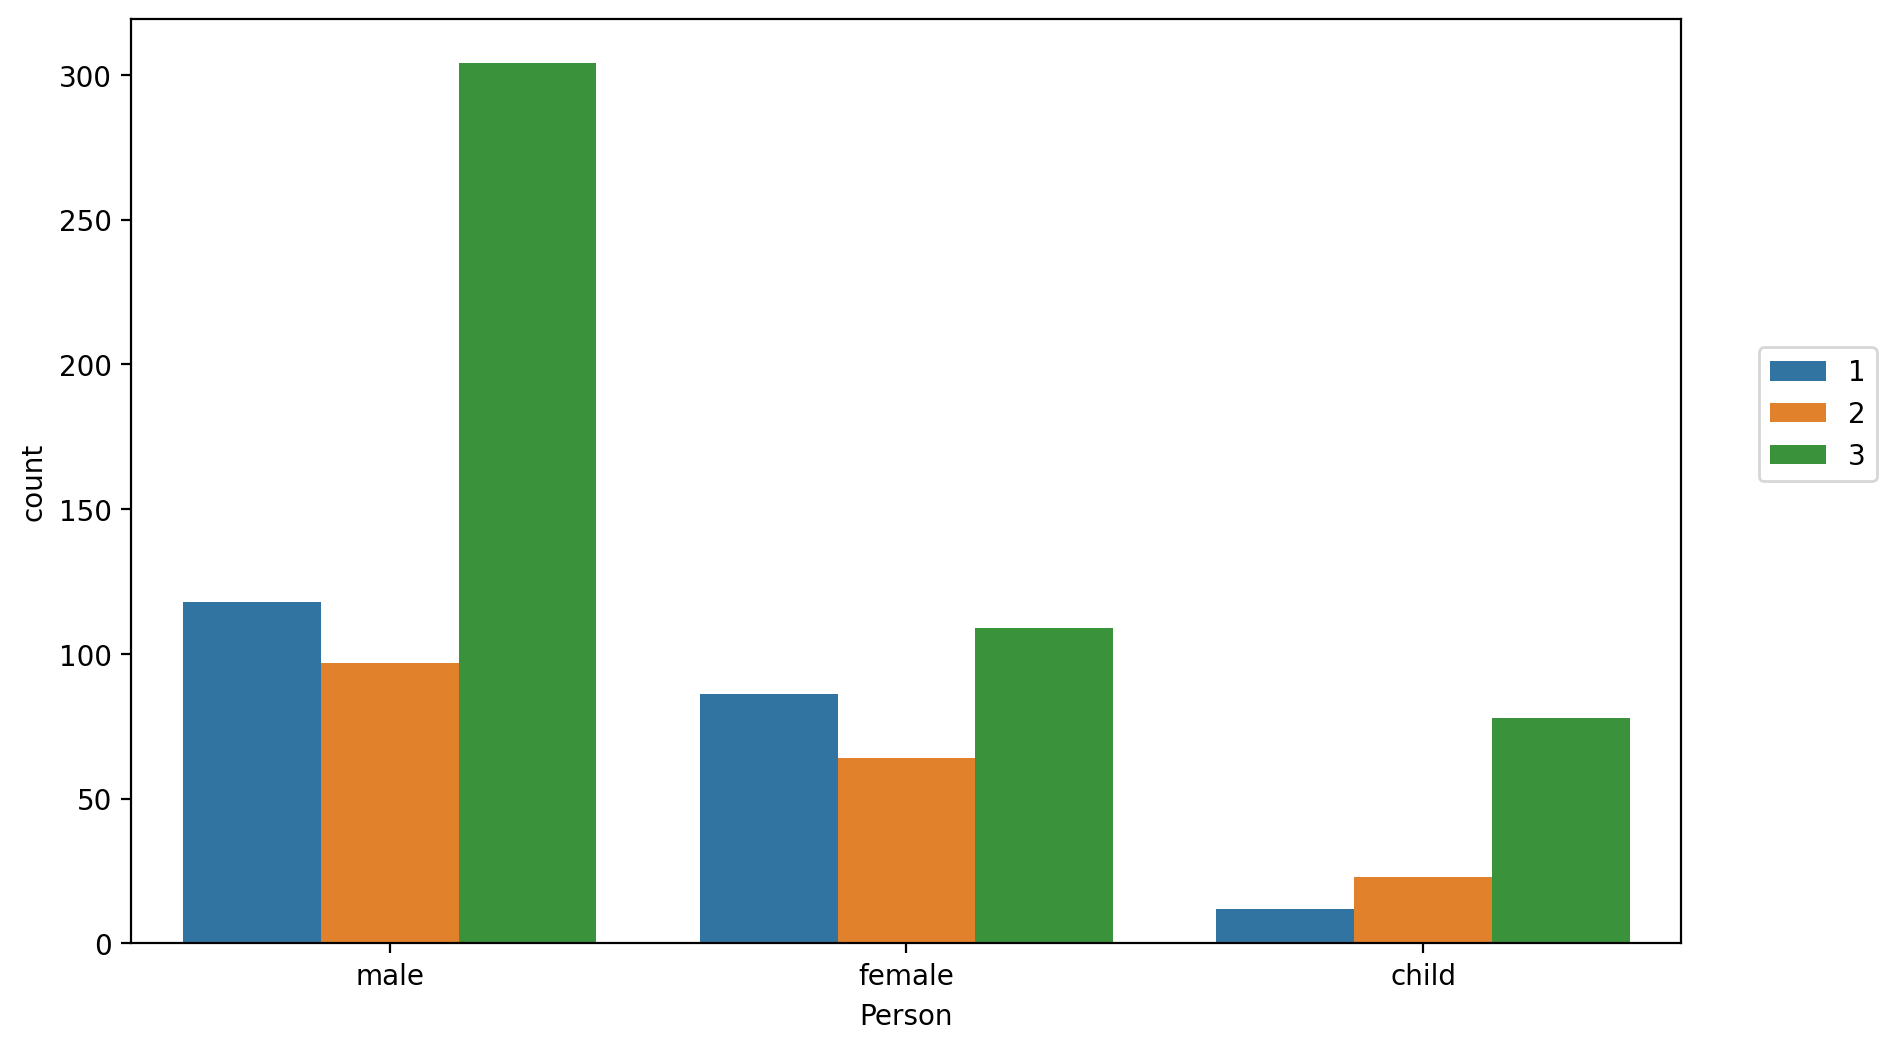

In [59]:
plt.figure(figsize=(10,6),dpi=200)
sns.countplot(data=titanic_df, x="Person",hue="Pclass")

plt.legend(loc=(1.05,0.5));

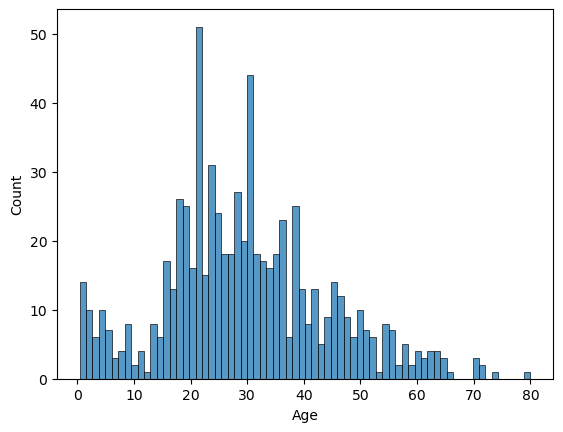

In [60]:
# This shows a distribution of the ages of the passengers
sns.histplot(data=titanic_df,x="Age",bins=70);

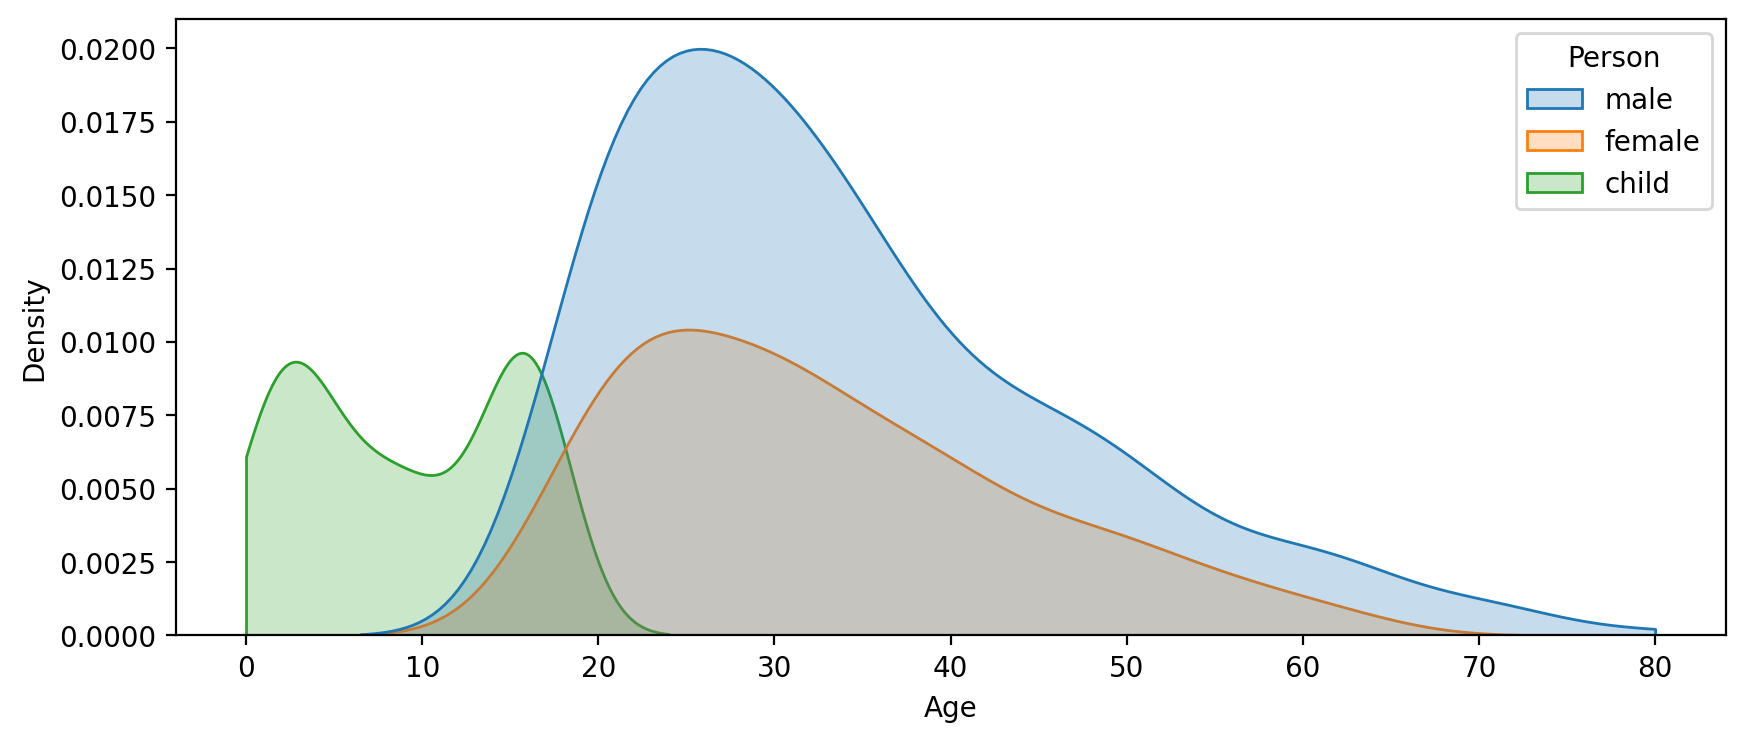

In [61]:
plt.figure(figsize=(10,4),dpi=200)
sns.kdeplot(data=titanic_df,x="Age",hue="Person",fill=True,clip=[0,80]);

### 3). Where did the passengers come from?

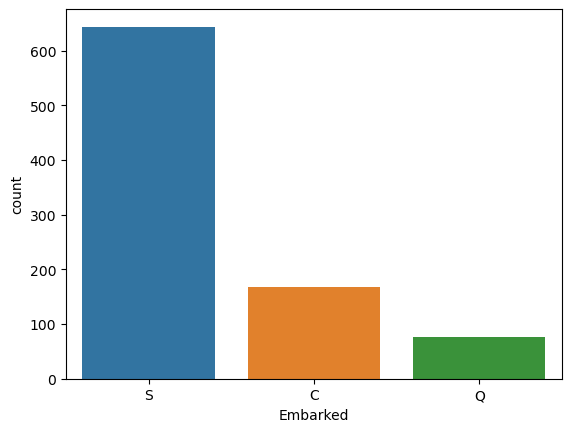

In [62]:
# Note that the letter C stands for Cherbourg, Q is for Queenstown, and S is for Southhampton
# i.e the cities the passengers came from.
sns.countplot(data=titanic_df,x="Embarked");

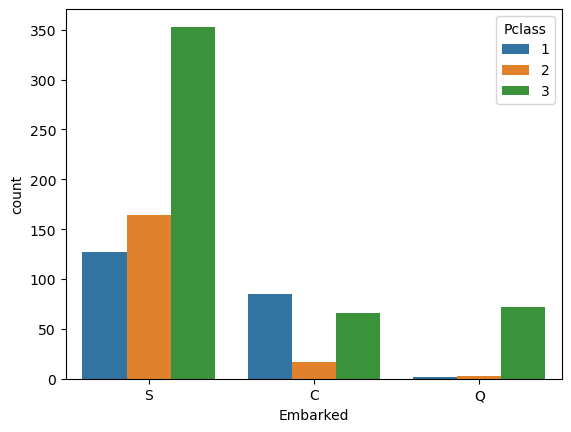

In [63]:
sns.countplot(data=titanic_df,x="Embarked",hue="Pclass");

### 4). Who was alone and who was with family?

In [64]:
# In the dataframe, the "SibSp" column is for the number of siblings a passenger had, if any.
# Also the "Parch" columns is for the number of parnts and children on board with each passenger.
# So a new column will be created that adds the values of both columns, any value equal to zero 
# means the passenger did not have any family at all.

titanic_df["Alone"] = titanic_df["Parch"] + titanic_df["SibSp"]

In [65]:
titanic_df["Alone"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [66]:
# Here a function is created that assigns the categories "Alone" and "With family" based on the values
# of the Alone column.
def with_family(individual):
    if individual != 0:
        return "With family"
    else:
        return "Alone"

In [67]:
titanic_df["Alone"] = titanic_df["Alone"].apply(with_family)

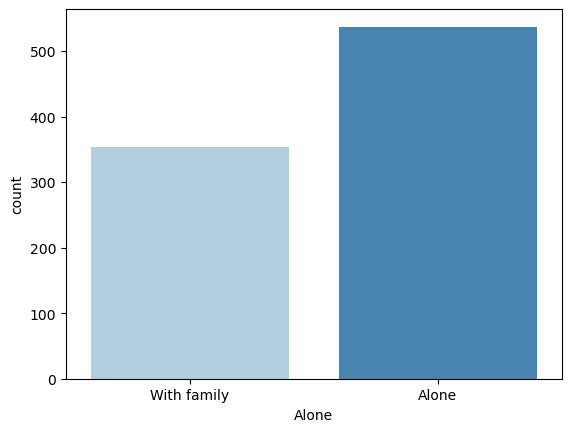

In [68]:
sns.countplot(data=titanic_df,x="Alone",palette="Blues");

### 5). What factors helped someone survive the sinking of the Titanic?

In [69]:
titanic_df["Survivor"]  = titanic_df.Survived.map({0:"No", 1:"Yes"})

In [70]:
titanic_df["Survivor"]

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
886     No
887    Yes
888     No
889    Yes
890     No
Name: Survivor, Length: 891, dtype: object

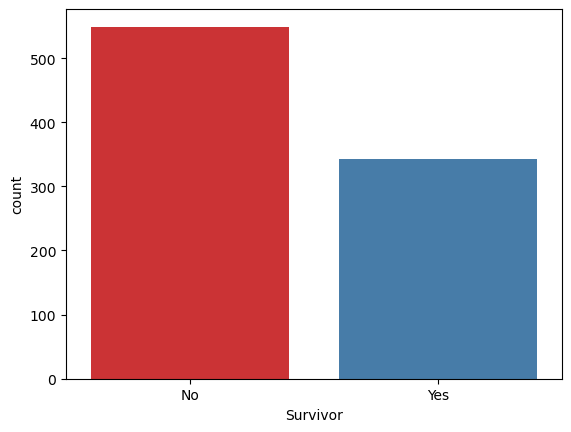

In [71]:
sns.countplot(data=titanic_df,x="Survivor",palette="Set1");

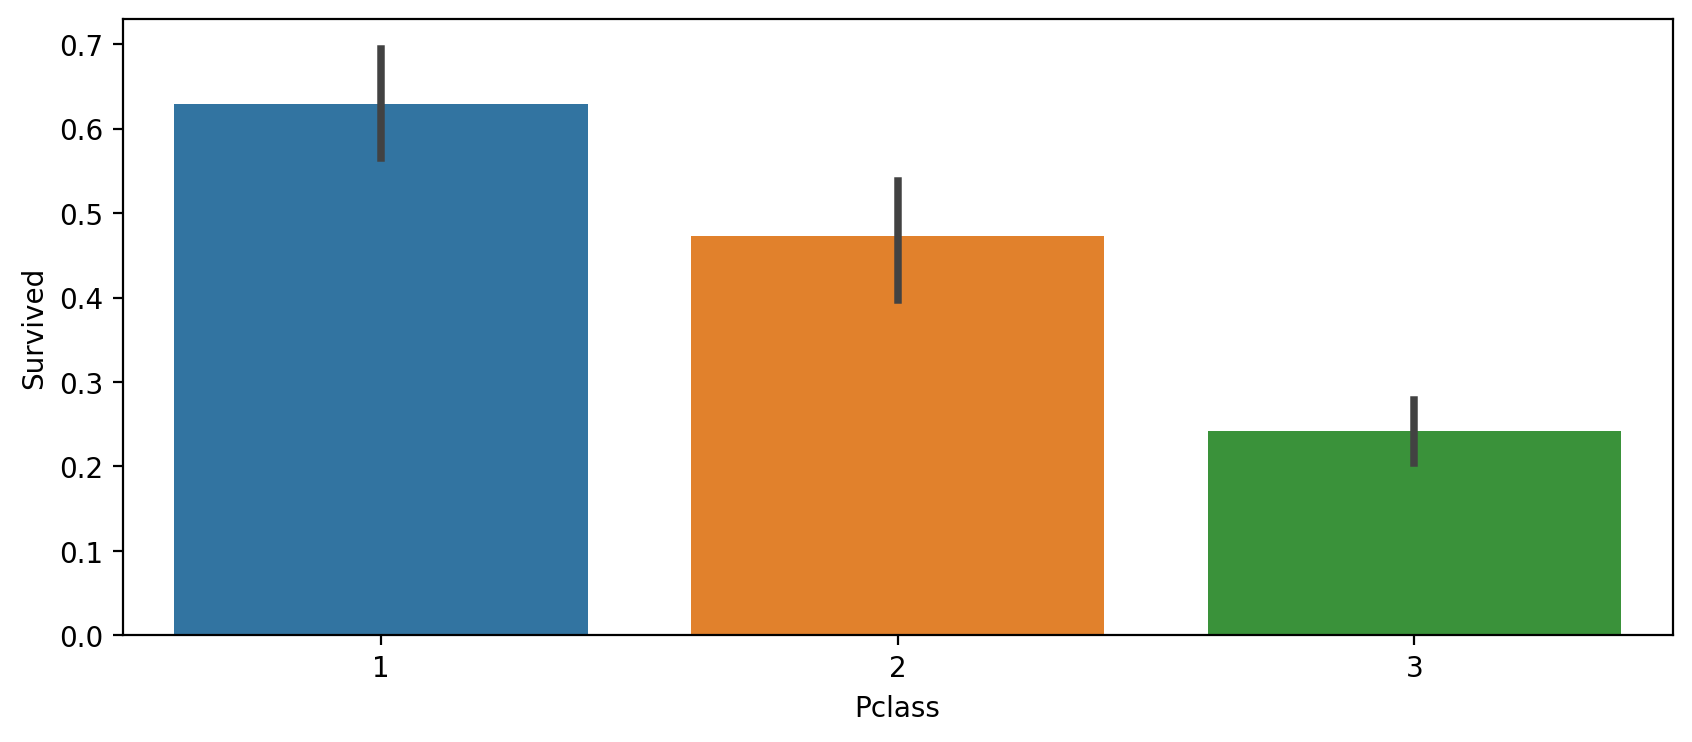

In [72]:
# Check if class was a factor in survival
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=titanic_df,x="Pclass",y="Survived");

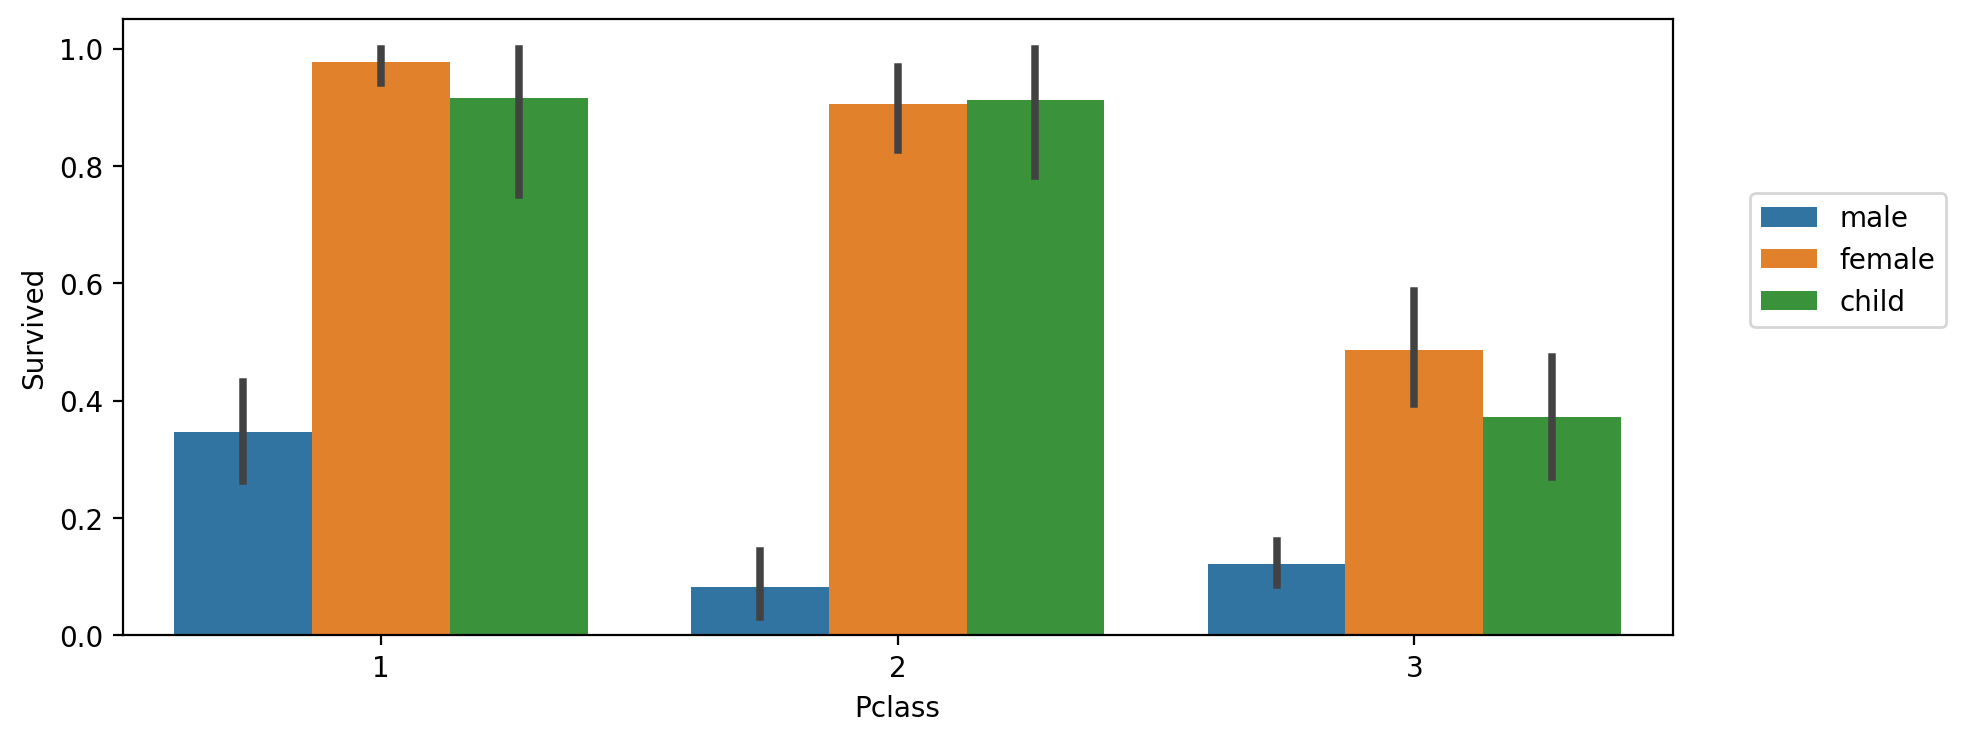

In [73]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=titanic_df,x="Pclass",y="Survived",hue="Person")

plt.legend(loc=(1.05,0.5));

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

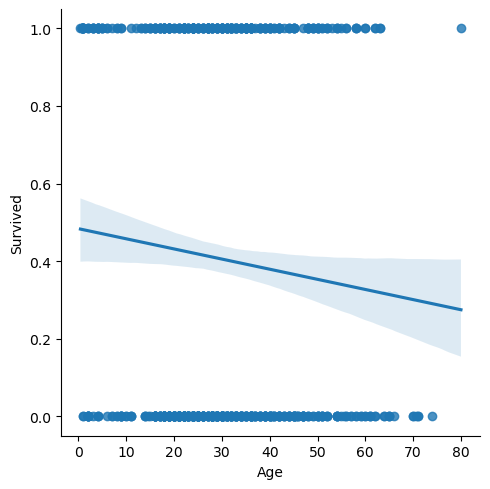

In [74]:
# Check if age was a factor
plt.figure(figsize=(10,4),dpi=200)
sns.lmplot(data=titanic_df,x="Age",y="Survived");

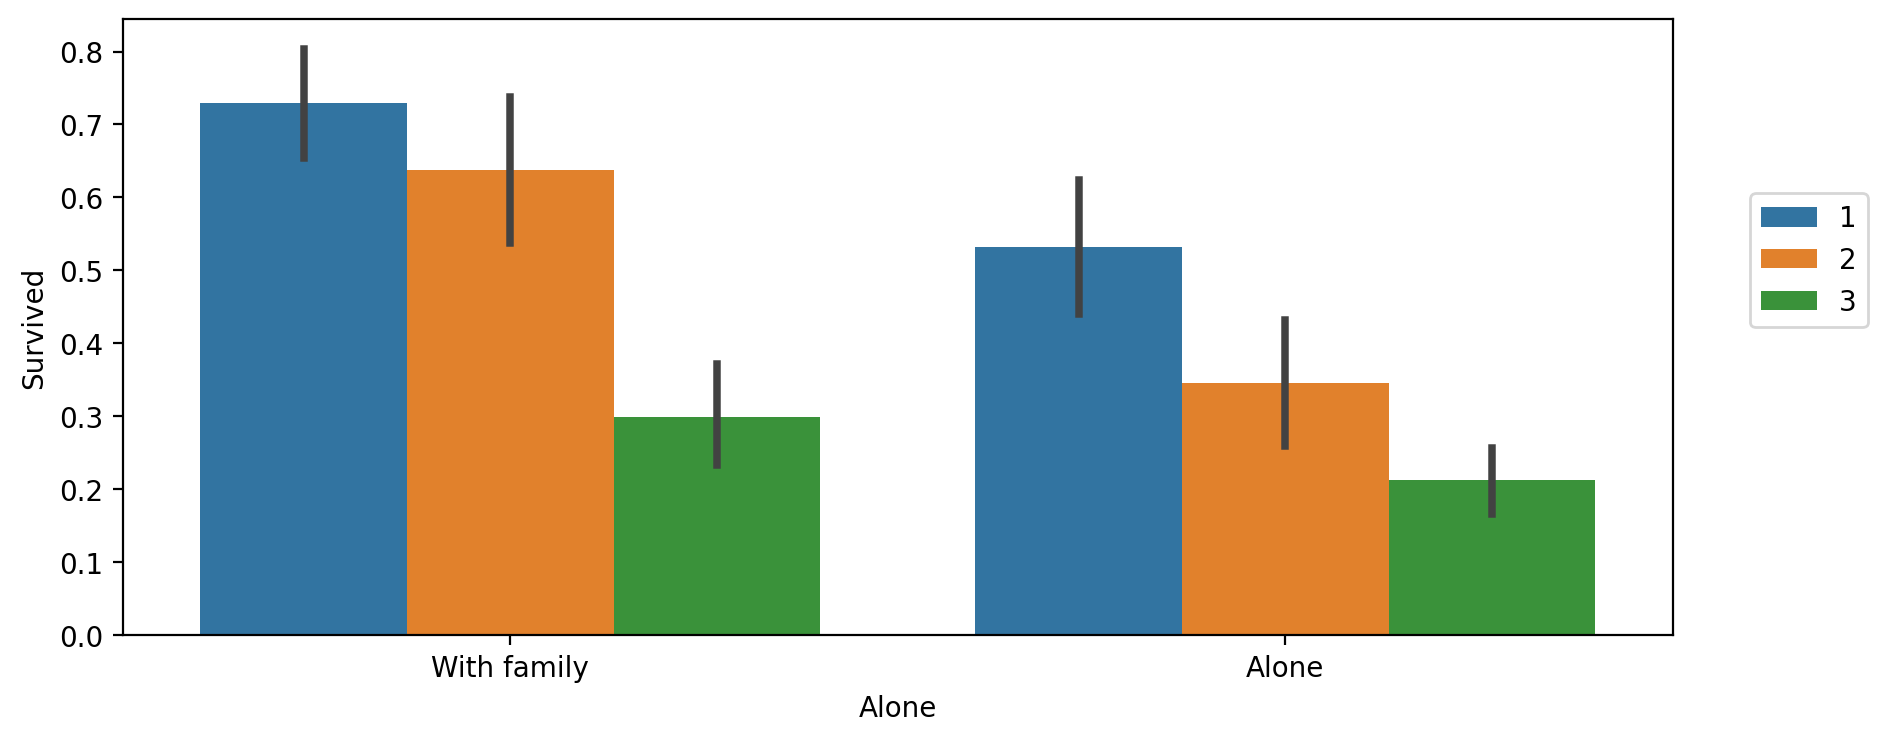

In [75]:
# Check if having family members increased the odds of survival
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=titanic_df,x="Alone",y="Survived",hue="Pclass")

plt.legend(loc=(1.05,0.5));